### Introduction

- Goal is to construct an SVM model to predict the most likely categorization of any previously unseen data items
- Here we have dataset of information on 12,330 sessions in the dataset. The dataset consists of 10 numerical and 8 categorical attributes. 
The 'Revenue' attribute can be used as the class label. 
- Data dictonary can be found here https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset

Steps:
1. Load the data and do some EDA work to gain some insights from the dataset.
2. Depending upon the information we learn from EDA work and also domain knowledge of the data, we will try to find key errors and pitfalls in the data which might create problem in futher model training. 
4. Compare the data before and after the transformations and give conclusion.
5. Apply a hierarchical clustering algorithm to the data.
6. Implement a K-means clustering algorithm. Start by using a range of values for K 
7. Apply a K-means clustering algorithm to the data set using a value of K=2
8. Add a new column to your Pandas dataframe with the name Revenue. and V_Revenue with data from new dataset from github 
9. Selecting the features for further modeling
10. SVM Modeling (at least two models) and evaluate the performance of models via cross validation using the training data set
11. Select the “best” regression model from those we have constructed and apply preferred model to the testing subset and assess how well it performs on that previously unseen data.
12. Compare the predicted values for the Revenue attribute from the testing data set to the corresponding values of the V_Revenue variable. 
13. Conclusion

In [139]:
# load the pandas library
import pandas as pd
import numpy as np
# importing seaborn and matplotlib pyplot libraries 
import seaborn as sns
import matplotlib.pyplot as plt
# importing dataset from github. 
# This data set contains information pertaining to Online Shoppers Purchasing Intention Dataset
filename = "https://raw.githubusercontent.com/getfitwithapurv/datascience/main/Project2_Data.csv"
data = pd.read_csv(filename)
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,0,0.0,0,0.0,8,222.000000,0.000000,0.028571,53.474571,0.0,May,1,1,1,2,New_Visitor,True
1,0,0.0,0,0.0,14,1037.500000,0.014286,0.047619,0.000000,0.0,Mar,2,2,4,2,Returning_Visitor,False
2,4,37.5,2,82.0,4,96.625000,0.000000,0.017500,0.000000,0.0,Nov,2,2,9,2,New_Visitor,False
3,4,115.7,0,0.0,16,655.383333,0.000000,0.012037,0.000000,0.0,Nov,1,1,2,3,Returning_Visitor,False
4,1,60.0,1,15.0,26,670.166667,0.000000,0.003846,0.000000,0.0,May,2,2,3,4,Returning_Visitor,False


 - From the information provided for the given data set we get to know that of the 12,330 sessions in the dataset, 84.5% (10,422) were negative class samples that did not end with shopping, and the rest (1908) were positive class samples ending with shopping. Hence Null error rate is 84.5%

In [140]:
# checking datatype and null values of data set
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [141]:
# check for missing values
data.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
dtype: int64

We need to convert categorical variables to numerical. We have three columns Month, Visitortype and Weekend which needs to be converted. First we will see unique values in these columns and then change it to numerical accordingly

In [142]:
data["Weekend"].unique() 

array([ True, False])

Only unique two values are there so we can assign 1 and 0 for this column. We will assign 1 for true and 0 for false

In [143]:
data['Weekend'] = data['Weekend'].map({True: 'True', False: 'False'}) #converting boolean to object

In [144]:
#Assign 'Yes' as 1 and 'No' as 0 in Weekend column of dataset 
data['Weekend'] = data['Weekend'].map({'True': 1, 'False': 0}) 

In [145]:
data["VisitorType"].value_counts() 

Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64

In [146]:
data.head() #sanity check

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,0,0.0,0,0.0,8,222.000000,0.000000,0.028571,53.474571,0.0,May,1,1,1,2,New_Visitor,1
1,0,0.0,0,0.0,14,1037.500000,0.014286,0.047619,0.000000,0.0,Mar,2,2,4,2,Returning_Visitor,0
2,4,37.5,2,82.0,4,96.625000,0.000000,0.017500,0.000000,0.0,Nov,2,2,9,2,New_Visitor,0
3,4,115.7,0,0.0,16,655.383333,0.000000,0.012037,0.000000,0.0,Nov,1,1,2,3,Returning_Visitor,0
4,1,60.0,1,15.0,26,670.166667,0.000000,0.003846,0.000000,0.0,May,2,2,3,4,Returning_Visitor,0


In [147]:
data["Month"].unique()

array(['May', 'Mar', 'Nov', 'Feb', 'June', 'Sep', 'Dec', 'Jul', 'Aug',
       'Oct'], dtype=object)

In [148]:
# Check the statistical information for the dataset
data.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586,0.232603
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169,0.422509
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000,0.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,0.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000,1.000000


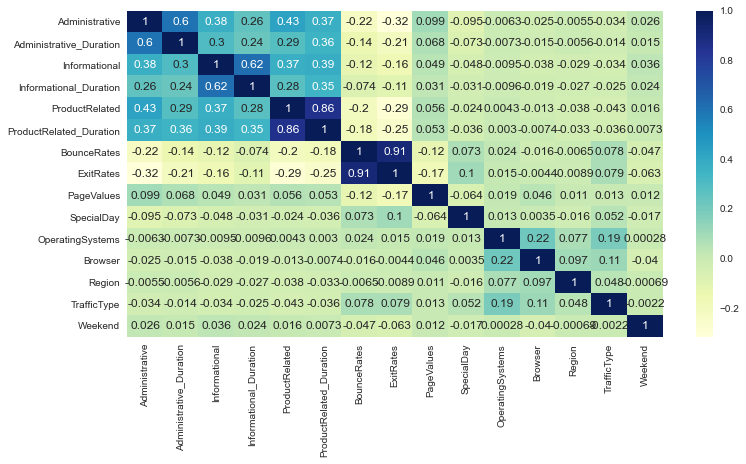

In [149]:
# Plotting heatmap to see correlation bewteen the features
plt.figure(figsize=(12,6))
corr = data.corr()
sns.heatmap(corr, cmap="YlGnBu",xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot=True)
plt.show()

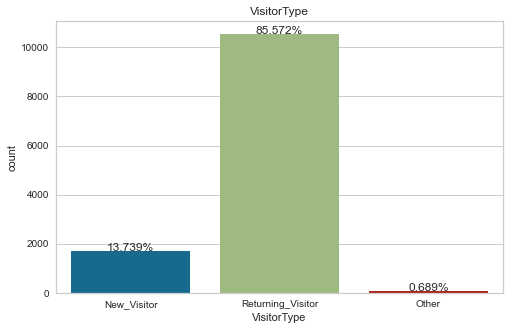

In [151]:
#count plot for loyalty column
plt.figure(figsize=(8, 5))
ax = sns.countplot(x="VisitorType", data=data)
plt.title('VisitorType')
#display the percentage above the bar 
total = len(data['VisitorType'])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 3,
            '{:1.3f}%'.format(100*(height/total)),
            ha="center")

In the data set we have 85.5% of returning visitor, 13.7% of new visitors and 0.7% of other category of visitors

In [152]:
# columns to list 
numeric = list(data.columns)
numeric

['Administrative',
 'Administrative_Duration',
 'Informational',
 'Informational_Duration',
 'ProductRelated',
 'ProductRelated_Duration',
 'BounceRates',
 'ExitRates',
 'PageValues',
 'SpecialDay',
 'Month',
 'OperatingSystems',
 'Browser',
 'Region',
 'TrafficType',
 'VisitorType',
 'Weekend']

In [153]:
numeric = [e for e in numeric if e not in ('Month', 'VisitorType')] #removing month and visitor type from the list

In [154]:
numeric #sanity check

['Administrative',
 'Administrative_Duration',
 'Informational',
 'Informational_Duration',
 'ProductRelated',
 'ProductRelated_Duration',
 'BounceRates',
 'ExitRates',
 'PageValues',
 'SpecialDay',
 'OperatingSystems',
 'Browser',
 'Region',
 'TrafficType',
 'Weekend']

In [155]:
# importing power_transform for normalization of numerical values 
from sklearn.preprocessing import power_transform
standardized_data = pd.DataFrame(power_transform(data[numeric]), columns = numeric)
standardized_data

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend
0,-0.990128,-0.996659,-0.520489,-0.491697,-0.619245,-0.532374,-0.799209,-0.029540,1.982295,-0.336020,-1.594583,-1.630444,-1.116671,-0.386728,1.816360
1,-0.990128,-0.996659,-0.520489,-0.491697,-0.168286,0.397858,0.423405,0.655157,-0.529409,-0.336020,0.023949,0.100778,0.723846,-0.386728,-0.550552
2,1.040186,0.662790,1.964686,2.069941,-1.132804,-0.912032,-0.799209,-0.581230,-0.529409,-0.336020,0.023949,0.100778,1.658089,-0.386728,-0.550552
3,1.040186,1.053114,-0.520489,-0.491697,-0.057127,0.085413,-0.799209,-0.907817,-0.529409,-0.336020,-1.594583,-1.630444,-0.199574,0.199041,-0.550552
4,0.091737,0.830316,1.823038,1.969567,0.356015,0.099835,-0.799209,-1.478985,-0.529409,-0.336020,0.023949,0.100778,0.348789,0.574105,-0.550552
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,0.848665,1.133167,-0.520489,-0.491697,-0.619245,-0.389351,-0.799209,-0.087474,-0.529409,-0.336020,0.023949,0.100778,-1.116671,0.199041,1.816360
12326,0.091737,0.122734,1.823038,2.030686,0.250488,0.477349,-0.060557,0.824127,-0.529409,-0.336020,0.023949,0.100778,1.391283,-0.386728,-0.550552
12327,-0.990128,-0.996659,-0.520489,-0.491697,1.468421,1.569443,0.122540,-0.054227,-0.529409,-0.336020,0.023949,0.100778,-1.116671,1.683081,-0.550552
12328,-0.990128,-0.996659,-0.520489,-0.491697,0.686988,0.629833,0.538033,0.686651,-0.529409,2.986508,0.023949,1.904352,0.348789,1.033546,1.816360


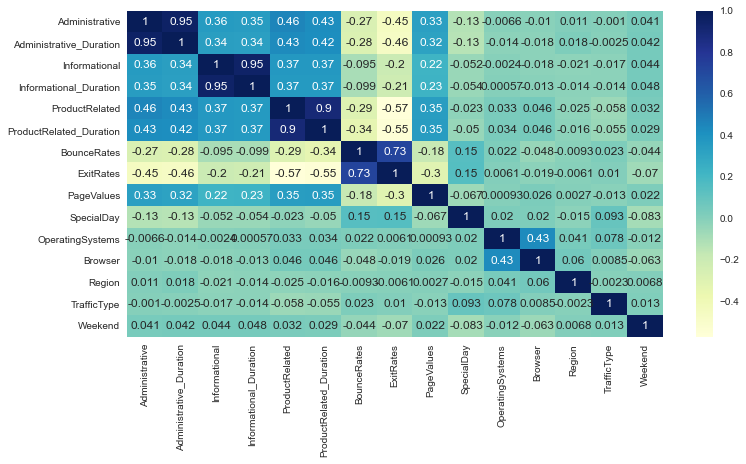

In [156]:
plt.figure(figsize=(12,6))
corr = standardized_data.corr()
sns.heatmap(corr, cmap="YlGnBu",xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot=True)
plt.show()

In [157]:
# Creating dummy variables from Month column:
df_dummies = pd.get_dummies(data, columns=['Month','VisitorType'])
df_dummies.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0.0,0,0.0,8,222.000000,0.000000,0.028571,53.474571,0.0,...,0,0,0,1,0,0,0,1,0,0
1,0,0.0,0,0.0,14,1037.500000,0.014286,0.047619,0.000000,0.0,...,0,0,1,0,0,0,0,0,0,1
2,4,37.5,2,82.0,4,96.625000,0.000000,0.017500,0.000000,0.0,...,0,0,0,0,1,0,0,1,0,0
3,4,115.7,0,0.0,16,655.383333,0.000000,0.012037,0.000000,0.0,...,0,0,0,0,1,0,0,0,0,1
4,1,60.0,1,15.0,26,670.166667,0.000000,0.003846,0.000000,0.0,...,0,0,0,1,0,0,0,0,0,1


In [158]:
df_dummies.columns #check columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Weekend',
       'Month_Aug', 'Month_Dec', 'Month_Feb', 'Month_Jul', 'Month_June',
       'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct', 'Month_Sep',
       'VisitorType_New_Visitor', 'VisitorType_Other',
       'VisitorType_Returning_Visitor'],
      dtype='object')

In [159]:
df_dummies.drop(df_dummies.iloc[:, 0:15], inplace=True, axis=1) #removing unwanted columns and keeping only dummy variables

In [160]:
df_dummies.head() #sanity check

,Month_Aug,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0,0,0,0,0,1,0,0,0,1,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,1,0,0,1,0,0
3,0,0,0,0,0,0,0,1,0,0,0,0,1
4,0,0,0,0,0,0,1,0,0,0,0,0,1


In [161]:
#joining dataset containing normalized data and dataset containing dummy variables
result = pd.concat([standardized_data, df_dummies], axis=1, join='inner')

In [162]:
result #sanity check

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,-0.990128,-0.996659,-0.520489,-0.491697,-0.619245,-0.532374,-0.799209,-0.029540,1.982295,-0.336020,...,0,0,0,1,0,0,0,1,0,0
1,-0.990128,-0.996659,-0.520489,-0.491697,-0.168286,0.397858,0.423405,0.655157,-0.529409,-0.336020,...,0,0,1,0,0,0,0,0,0,1
2,1.040186,0.662790,1.964686,2.069941,-1.132804,-0.912032,-0.799209,-0.581230,-0.529409,-0.336020,...,0,0,0,0,1,0,0,1,0,0
3,1.040186,1.053114,-0.520489,-0.491697,-0.057127,0.085413,-0.799209,-0.907817,-0.529409,-0.336020,...,0,0,0,0,1,0,0,0,0,1
4,0.091737,0.830316,1.823038,1.969567,0.356015,0.099835,-0.799209,-1.478985,-0.529409,-0.336020,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,0.848665,1.133167,-0.520489,-0.491697,-0.619245,-0.389351,-0.799209,-0.087474,-0.529409,-0.336020,...,0,0,1,0,0,0,0,0,0,1
12326,0.091737,0.122734,1.823038,2.030686,0.250488,0.477349,-0.060557,0.824127,-0.529409,-0.336020,...,0,0,0,0,1,0,0,0,0,1
12327,-0.990128,-0.996659,-0.520489,-0.491697,1.468421,1.569443,0.122540,-0.054227,-0.529409,-0.336020,...,1,0,0,0,0,0,0,0,0,1
12328,-0.990128,-0.996659,-0.520489,-0.491697,0.686988,0.629833,0.538033,0.686651,-0.529409,2.986508,...,0,0,0,1,0,0,0,0,0,1


#### Step 5: Apply a hierarchical clustering algorithm to the data

In [163]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

In [164]:
X = result

In [165]:
X = X.values

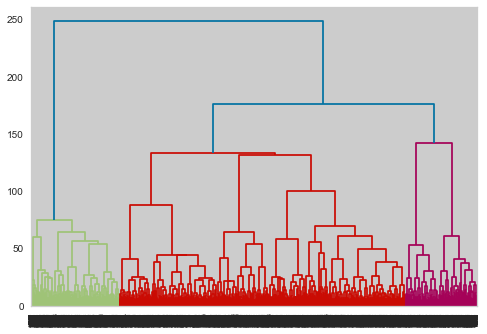

In [166]:
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))

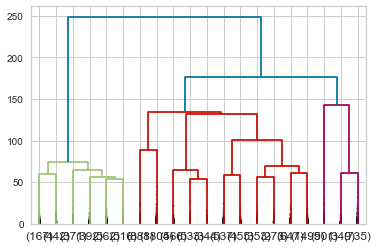

In [167]:
from scipy.cluster import hierarchy
fig, ax = plt.subplots(figsize=(6, 4))
dend = hierarchy.dendrogram(
    hierarchy.linkage(X, method="ward"),
    truncate_mode="lastp",
    p=20,
    show_contracted=True,
)

In [168]:
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
model.fit(X)
labels = model.labels_

/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [170]:
labels

array([2, 2, 1, ..., 2, 0, 2])

Looking at the dendrogram, the highest vertical distance that doesn’t intersect with any clusters is the blue one on the pink. Given that 3 vertical lines cross the threshold, the optimal number of clusters is 3.

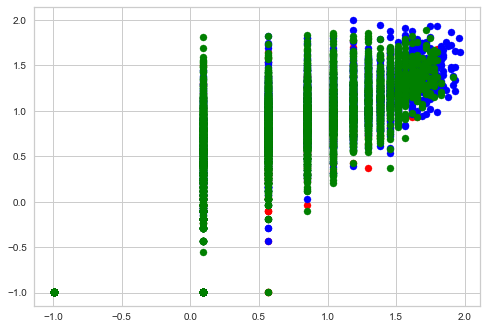

In [171]:
plt.scatter(X[labels==0, 0], X[labels==0, 1], s=50, marker='o', color='red')
plt.scatter(X[labels==1, 0], X[labels==1, 1], s=50, marker='o', color='blue')
plt.scatter(X[labels==2, 0], X[labels==2, 1], s=50, marker='o', color='green')
plt.scatter(X[labels==3, 0], X[labels==3, 1], s=50, marker='o', color='purple')
plt.scatter(X[labels==4, 0], X[labels==4, 1], s=50, marker='o', color='orange')
plt.show()

#### Step6: Implement a K-means clustering algorithm. Start by using a range of values for K to create an elbow plot and a silhouette plot for the data set 

In [172]:
from sklearn.cluster import KMeans

In [173]:
km = KMeans(2, random_state=42)
km.fit(X)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2, random_state=42)

In [174]:
X_km = km.predict(X)
X_km

array([0, 0, 1, ..., 0, 0, 1], dtype=int32)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/clust

Text(0, 0.5, 'Inertia')

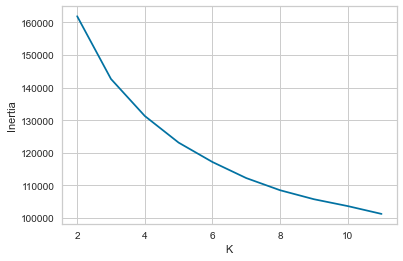

In [175]:
inertias = []
sizes = range(2, 12)
for k in sizes:
    k2 = KMeans(random_state=42, n_clusters=k)
    k2.fit(X)
    inertias.append(k2.inertia_)
fig, ax = plt.subplots(figsize=(6, 4))
pd.Series(inertias, index=sizes).plot(ax=ax)
ax.set_xlabel("K")
ax.set_ylabel("Inertia")

/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/clust

array([[<AxesSubplot:xlabel='k'>, <AxesSubplot:xlabel='k'>],
       [<AxesSubplot:xlabel='k'>, <AxesSubplot:xlabel='k'>]], dtype=object)

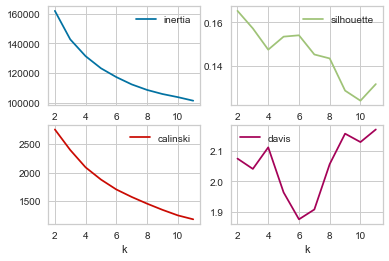

In [176]:
from sklearn import metrics
inertias = []
sils = []
chs = []
dbs = []
sizes = range(2, 12)
for k in sizes:
    k2 = KMeans(random_state=42, n_clusters=k)
    k2.fit(X)
    inertias.append(k2.inertia_)
    sils.append(
        metrics.silhouette_score(X, k2.labels_)
    )
    chs.append(
        metrics.calinski_harabasz_score(
            X, k2.labels_
        )
    )
    dbs.append(
        metrics.davies_bouldin_score(
            X, k2.labels_
        )
    )
fig, ax = plt.subplots(figsize=(6, 4))
(
    pd.DataFrame(
        {
            "inertia": inertias,
            "silhouette": sils,
            "calinski": chs,
            "davis": dbs,
            "k": sizes,
        }
    )
    .set_index("k")
    .plot(ax=ax, subplots=True, layout=(2, 2))
)

In [177]:
from yellowbrick.cluster.silhouette import (
    SilhouetteVisualizer,
)
import matplotlib.pyplot as plt

/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


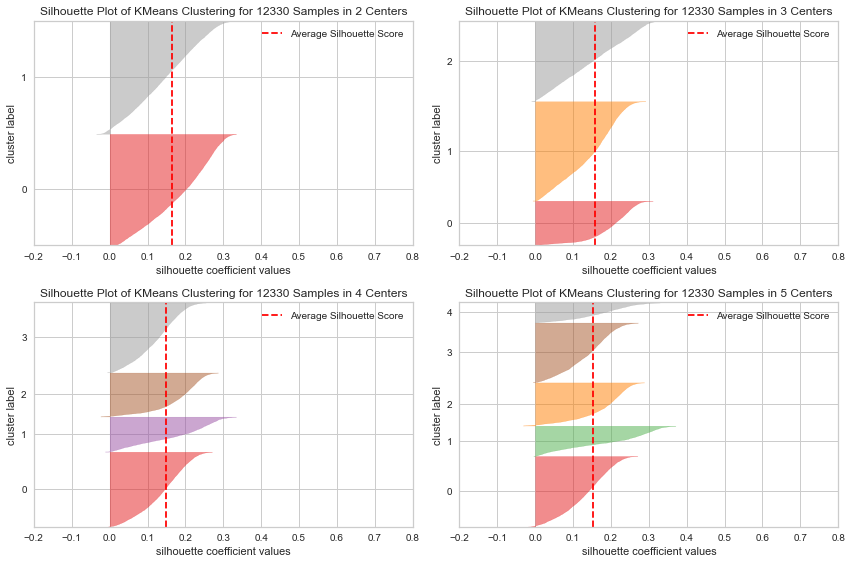

In [178]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.reshape(4)
for i, k in enumerate(range(2, 6)):
    ax = axes[i]
    sil = SilhouetteVisualizer(
        KMeans(n_clusters=k, random_state=42),
        ax=ax,
    )
    sil.fit(X)
    sil.finalize()
    ax.set_xlim(-0.2, 0.8)
plt.tight_layout()

#### Step 7: Apply a K-means clustering algorithm to the data set using a value of K=2. At the conclusion of that process you will have two (2) groupings of data.

In [179]:
km = KMeans(n_clusters=2)
km.fit(X)
labels = km.predict(result)
(
    result.assign(cluster=labels)
    .groupby("cluster")
    .agg(["mean", "var"])
    .T
)



/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(


cluster                                    0         1
Administrative                mean  0.793208 -0.804351
                              var   0.474612  0.247890
Administrative_Duration       mean  0.804190 -0.815487
                              var   0.417933  0.269530
Informational                 mean  0.444432 -0.450675
                              var   1.427907  0.162939
Informational_Duration        mean  0.440620 -0.446810
                              var   1.487290  0.109614
ProductRelated                mean  0.554952 -0.562747
                              var   0.646925  0.729278
ProductRelated_Duration       mean  0.530030 -0.537476
                              var   0.637112  0.794461
BounceRates                   mean -0.350113  0.355031
                              var   0.339833  1.419381
ExitRates                     mean -0.569288  0.577285
                              var   0.396323  0.950478
PageValues                    mean  0.395541 -0.401098
                              var   1.374820  0.300658
SpecialDay                    mean -0.157993  0.160213
                              var   0.557517  1.398038
OperatingSystems              mean -0.002756  0.002794
                              var   0.940176  1.060976
Browser                       mean  0.001570 -0.001593
                              var   0.937388  1.063814
Region                        mean  0.003539 -0.003589
                              var   1.002632  0.997632
TrafficType                   mean -0.029925  0.030345
                              var   0.869631  1.130699
Weekend                       mean  0.059858 -0.060699
                              var   1.072359  0.919632
Month_Aug                     mean  0.044942  0.025155
                              var   0.042929  0.024526
Month_Dec                     mean  0.138209  0.141947
                              var   0.119126  0.121818
Month_Feb                     mean  0.004027  0.025972
                              var   0.004011  0.025301
Month_Jul                     mean  0.037049  0.032996
                              var   0.035682  0.031912
Month_June                    mean  0.020135  0.026625
                              var   0.019733  0.025921
Month_Mar                     mean  0.139659  0.169879
                              var   0.120173  0.141043
Month_May                     mean  0.234858  0.311336
                              var   0.179729  0.214441
Month_Nov                     mean  0.269813  0.216106
                              var   0.197046  0.169432
Month_Oct                     mean  0.062661  0.026135
                              var   0.058744  0.025456
Month_Sep                     mean  0.048647  0.023848
                              var   0.046288  0.023283
VisitorType_New_Visitor       mean  0.176063  0.098171
                              var   0.145088  0.088548
VisitorType_Other             mean  0.004832  0.008984
                              var   0.004810  0.008905
VisitorType_Returning_Visitor mean  0.819104  0.892845
                              var   0.148196  0.095688

<AxesSubplot:>

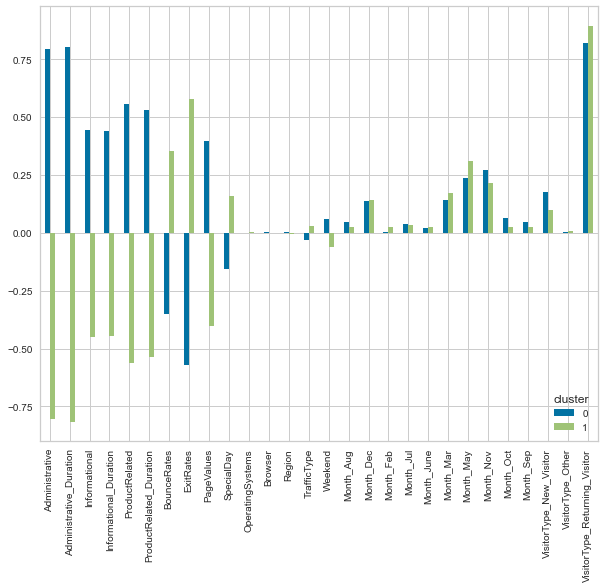

In [180]:
fig, ax = plt.subplots(figsize=(10, 8))
(
    result.assign(cluster=labels)
    .groupby("cluster")
    .mean()
    .T.plot.bar(ax=ax)
)

#### Step 9: Add a new column to your Pandas dataframe with the name Revenue. Within this new column, insert the grouping assignments identified by your K-means clustering for each observation within the data set.

In [181]:
#our dataframe is result
result #sanity check

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,-0.990128,-0.996659,-0.520489,-0.491697,-0.619245,-0.532374,-0.799209,-0.029540,1.982295,-0.336020,...,0,0,0,1,0,0,0,1,0,0
1,-0.990128,-0.996659,-0.520489,-0.491697,-0.168286,0.397858,0.423405,0.655157,-0.529409,-0.336020,...,0,0,1,0,0,0,0,0,0,1
2,1.040186,0.662790,1.964686,2.069941,-1.132804,-0.912032,-0.799209,-0.581230,-0.529409,-0.336020,...,0,0,0,0,1,0,0,1,0,0
3,1.040186,1.053114,-0.520489,-0.491697,-0.057127,0.085413,-0.799209,-0.907817,-0.529409,-0.336020,...,0,0,0,0,1,0,0,0,0,1
4,0.091737,0.830316,1.823038,1.969567,0.356015,0.099835,-0.799209,-1.478985,-0.529409,-0.336020,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,0.848665,1.133167,-0.520489,-0.491697,-0.619245,-0.389351,-0.799209,-0.087474,-0.529409,-0.336020,...,0,0,1,0,0,0,0,0,0,1
12326,0.091737,0.122734,1.823038,2.030686,0.250488,0.477349,-0.060557,0.824127,-0.529409,-0.336020,...,0,0,0,0,1,0,0,0,0,1
12327,-0.990128,-0.996659,-0.520489,-0.491697,1.468421,1.569443,0.122540,-0.054227,-0.529409,-0.336020,...,1,0,0,0,0,0,0,0,0,1
12328,-0.990128,-0.996659,-0.520489,-0.491697,0.686988,0.629833,0.538033,0.686651,-0.529409,2.986508,...,0,0,0,1,0,0,0,0,0,1


In [182]:
#adding new column 'Revenue' to the dataframe and insert the grouping assignments identified by your K-means clustering for each observation
result["Revenue"] = labels

In [183]:
result

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Revenue
0,-0.990128,-0.996659,-0.520489,-0.491697,-0.619245,-0.532374,-0.799209,-0.029540,1.982295,-0.336020,...,0,0,1,0,0,0,1,0,0,1
1,-0.990128,-0.996659,-0.520489,-0.491697,-0.168286,0.397858,0.423405,0.655157,-0.529409,-0.336020,...,0,1,0,0,0,0,0,0,1,1
2,1.040186,0.662790,1.964686,2.069941,-1.132804,-0.912032,-0.799209,-0.581230,-0.529409,-0.336020,...,0,0,0,1,0,0,1,0,0,0
3,1.040186,1.053114,-0.520489,-0.491697,-0.057127,0.085413,-0.799209,-0.907817,-0.529409,-0.336020,...,0,0,0,1,0,0,0,0,1,0
4,0.091737,0.830316,1.823038,1.969567,0.356015,0.099835,-0.799209,-1.478985,-0.529409,-0.336020,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,0.848665,1.133167,-0.520489,-0.491697,-0.619245,-0.389351,-0.799209,-0.087474,-0.529409,-0.336020,...,0,1,0,0,0,0,0,0,1,0
12326,0.091737,0.122734,1.823038,2.030686,0.250488,0.477349,-0.060557,0.824127,-0.529409,-0.336020,...,0,0,0,1,0,0,0,0,1,0
12327,-0.990128,-0.996659,-0.520489,-0.491697,1.468421,1.569443,0.122540,-0.054227,-0.529409,-0.336020,...,0,0,0,0,0,0,0,0,1,1
12328,-0.990128,-0.996659,-0.520489,-0.491697,0.686988,0.629833,0.538033,0.686651,-0.529409,2.986508,...,0,0,1,0,0,0,0,0,1,1


#### Step 10:  Read the Project2_Data_Labels.csv file from your Github repository and add its content to another new column within your Pandas dataframe. Assign a column name of V_Revenue to this new column.

In [184]:
#read file from github
filename2 = "https://raw.githubusercontent.com/getfitwithapurv/demo.py/main/Project2_Data_Labels.csv"
data2 = pd.read_csv(filename2)
data2

,Revenue
0,True
1,False
2,False
3,False
4,False
...,...
12325,False
12326,False
12327,False
12328,False


In [185]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Revenue  12330 non-null  bool 
dtypes: bool(1)
memory usage: 12.2 KB


data type is booelean so need to convert it to object

In [186]:
data2['Revenue'] = data2['Revenue'].map({True: 'True', False: 'False'}) #converting boolean to object

In [187]:
#Assign 'Yes' as 1 and 'No' as 0 in Weekend column of dataset 
data2['Revenue'] = data2['Revenue'].map({'True': 1, 'False': 0}) 

In [188]:
data2.head() #sanity check

,Revenue
0,1
1,0
2,0
3,0
4,0


In [189]:
result["V_Revenue"] = data2 #adding column from data2 to our dataset

In [190]:
result

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Revenue,V_Revenue
0,-0.990128,-0.996659,-0.520489,-0.491697,-0.619245,-0.532374,-0.799209,-0.029540,1.982295,-0.336020,...,0,1,0,0,0,1,0,0,1,1
1,-0.990128,-0.996659,-0.520489,-0.491697,-0.168286,0.397858,0.423405,0.655157,-0.529409,-0.336020,...,1,0,0,0,0,0,0,1,1,0
2,1.040186,0.662790,1.964686,2.069941,-1.132804,-0.912032,-0.799209,-0.581230,-0.529409,-0.336020,...,0,0,1,0,0,1,0,0,0,0
3,1.040186,1.053114,-0.520489,-0.491697,-0.057127,0.085413,-0.799209,-0.907817,-0.529409,-0.336020,...,0,0,1,0,0,0,0,1,0,0
4,0.091737,0.830316,1.823038,1.969567,0.356015,0.099835,-0.799209,-1.478985,-0.529409,-0.336020,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,0.848665,1.133167,-0.520489,-0.491697,-0.619245,-0.389351,-0.799209,-0.087474,-0.529409,-0.336020,...,1,0,0,0,0,0,0,1,0,0
12326,0.091737,0.122734,1.823038,2.030686,0.250488,0.477349,-0.060557,0.824127,-0.529409,-0.336020,...,0,0,1,0,0,0,0,1,0,0
12327,-0.990128,-0.996659,-0.520489,-0.491697,1.468421,1.569443,0.122540,-0.054227,-0.529409,-0.336020,...,0,0,0,0,0,0,0,1,1,0
12328,-0.990128,-0.996659,-0.520489,-0.491697,0.686988,0.629833,0.538033,0.686651,-0.529409,2.986508,...,0,1,0,0,0,0,0,1,1,0


- statistics between revenue and v_revenue

###  SVM Model Construction & Evaluation

In [191]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.svm import SVC

In [192]:
result.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Weekend',
       'Month_Aug', 'Month_Dec', 'Month_Feb', 'Month_Jul', 'Month_June',
       'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct', 'Month_Sep',
       'VisitorType_New_Visitor', 'VisitorType_Other',
       'VisitorType_Returning_Visitor', 'Revenue', 'V_Revenue'],
      dtype='object')

#### Model 1

In [193]:
X1 = result.drop(['Revenue','V_Revenue'], axis=1).values
y1 = result['Revenue'].values

In [194]:
X1

array([[-0.99012808, -0.99665853, -0.52048939, ...,  1.        ,
         0.        ,  0.        ],
       [-0.99012808, -0.99665853, -0.52048939, ...,  0.        ,
         0.        ,  1.        ],
       [ 1.04018629,  0.66278999,  1.96468584, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [-0.99012808, -0.99665853, -0.52048939, ...,  0.        ,
         0.        ,  1.        ],
       [-0.99012808, -0.99665853, -0.52048939, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.09173731,  0.90176943, -0.52048939, ...,  0.        ,
         0.        ,  1.        ]])

In [195]:
y1

array([1, 1, 0, ..., 1, 1, 0], dtype=int32)

In [196]:
#train test split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.3)

In [197]:
svc_model = SVC()
svc_model.fit(X_train1, y_train1)

SVC()

In [198]:
training_predictions1 = svc_model.predict(X_train1)
print(classification_report(y_train1, training_predictions1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4361
           1       1.00      1.00      1.00      4270

    accuracy                           1.00      8631
   macro avg       1.00      1.00      1.00      8631
weighted avg       1.00      1.00      1.00      8631



In [199]:
# load the cross_val_score function from the sklearn.model_selection module
from sklearn import svm
from sklearn.model_selection import cross_val_score

In [200]:
# evaluate the model using 5-fold cross-validation
clf = svm.SVC(kernel='linear', C=1, random_state=42)
scores1 = cross_val_score(clf, X_train1, y_train1, cv=5)
scores1

array([0.99652577, 0.99652375, 0.99652375, 0.99594438, 0.99826188])

In [201]:
print (scores1.mean())

0.9967559066318394


#### Model 2:

In [208]:
X2 = result.drop(['Administrative', 'Informational','ProductRelated','Revenue','V_Revenue'], axis=1).values
y2 = result['Revenue'].values

In [209]:
X2

array([[-0.99665853, -0.49169737, -0.53237422, ...,  1.        ,
         0.        ,  0.        ],
       [-0.99665853, -0.49169737,  0.39785772, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.66278999,  2.06994086, -0.91203165, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [-0.99665853, -0.49169737,  1.56944281, ...,  0.        ,
         0.        ,  1.        ],
       [-0.99665853, -0.49169737,  0.629833  , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.90176943, -0.49169737,  1.15589859, ...,  0.        ,
         0.        ,  1.        ]])

In [210]:
y2

array([1, 1, 0, ..., 1, 1, 0], dtype=int32)

In [211]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.3)

In [212]:
svc_model2 = SVC()
svc_model2.fit(X_train2, y_train2)

SVC()

In [219]:
training_predictions2 = svc_model2.predict(X_train2)
print(classification_report(y_train2, training_predictions2))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      4337
           1       0.98      0.98      0.98      4294

    accuracy                           0.98      8631
   macro avg       0.98      0.98      0.98      8631
weighted avg       0.98      0.98      0.98      8631



In [214]:
# evaluate the model using 5-fold cross-validation
clf2 = svm.SVC(kernel='linear', C=1, random_state=42)
scores2 = cross_val_score(clf2, X_train2, y_train2, cv=5)
scores2

array([0.97336422, 0.97914253, 0.97798378, 0.97682503, 0.97682503])

In [215]:
print (scores2.mean())

0.976828115386396


#### Model 
---------------------------------------------------------------------  
      1                        precision    recall  f1-score   support
--------------------------------------------------------------------------
                        0       0.99      1.00      1.00      4316
                        1       1.00      0.99      1.00      4315

                 accuracy                           1.00      8631
                macro avg       1.00      1.00      1.00      8631
             weighted avg       1.00      1.00      1.00      8631
              
              cross-validation score (mean) = 0.9967
  
---------------------------------------------------------------------------
       2                       precision    recall  f1-score   support
----------------------------------------------------------------------------
                       0       0.98      0.98      0.98      4337
                       1       0.98      0.98      0.98      4294

                accuracy                           0.98      8631
               macro avg       0.98      0.98      0.98      8631
            weighted avg       0.98      0.98      0.98      8631

              
              cross-validation score (mean) = 0.9768
  

#### From the results above, we will select model 1 for testing 

In [216]:
testing_predictions1 = svc_model.predict(X_test1)
print(classification_report(y_test1, testing_predictions1))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1847
           1       0.99      0.99      0.99      1852

    accuracy                           0.99      3699
   macro avg       0.99      0.99      0.99      3699
weighted avg       0.99      0.99      0.99      3699



In [217]:
# evaluate the model using 5-fold cross-validation
clf3 = svm.SVC(kernel='linear', C=1, random_state=42)
scores3 = cross_val_score(clf3, X_test1, y_test1, cv=5)
scores3

array([0.98783784, 0.99189189, 0.9972973 , 0.99189189, 0.99729364])

In [218]:
scores3.mean()

0.9932425117946092

- We got cross-validation score (mean) = 0.9932 for the testing data for model 1

### Conclusion : 

- We have successfully completed all the steps mentioned in the introduction for this assignment.
- We have created two different SVM models and compared thier scores and chose the best one(1st model) to do evaluation on the test dataset and go the cross validation score of 0.9932

### References : 
- Prof. Topor's lecture notes
- https://github.com/mattharrison/ml_pocket_reference/blob/master/ch18.ipynb
-https://towardsdatascience.com/machine-learning-algorithms-part-12-hierarchical-agglomerative-clustering-example-in-python-1e18e0075019
- https://towardsdatascience.com/machine-learning-algorithms-part-9-k-means-example-in-python-f2ad05ed5203
- https://www.analyticsvidhya.com/blog/2021/05/k-mean-getting-the-optimal-number-of-clusters/